# Capstone Project: Create a Customer Segmentation Report for Arvato Financial Services

In this project, you will analyze demographics data for customers of a mail-order sales company in Germany, comparing it against demographics information for the general population. You'll use unsupervised learning techniques to perform customer segmentation, identifying the parts of the population that best describe the core customer base of the company. Then, you'll apply what you've learned on a third dataset with demographics information for targets of a marketing campaign for the company, and use a model to predict which individuals are most likely to convert into becoming customers for the company. The data that you will use has been provided by our partners at Bertelsmann Arvato Analytics, and represents a real-life data science task.

If you completed the first term of this program, you will be familiar with the first part of this project, from the unsupervised learning project. The versions of those two datasets used in this project will include many more features and has not been pre-cleaned. You are also free to choose whatever approach you'd like to analyzing the data rather than follow pre-determined steps. In your work on this project, make sure that you carefully document your steps and decisions, since your main deliverable for this project will be a blog post reporting your findings.

In [1]:
# import libraries here; add more as necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# magic word for producing visualizations in notebook
%matplotlib inline

# for feature selection
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score

# Random State
np.random.seed(42)

# Saving
import pickle

# for clustering
from sklearn.cluster import KMeans

# for model selection and modelling
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn.svm import LinearSVC, SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report

Using TensorFlow backend.


**Functions and Information Required**

In [2]:
# Column types dictionary consist column names and their respective dtaypes.
# I've created this dictionary from explanation excel data given by project host.
# 313 columns were descibed host's data excels.
# Remaining columns are controlled and their dtypes are defined by me. 
column_types = {'AGER_TYP':'category','ALTERSKATEGORIE_GROB':'category','ALTER_HH':'category','ANREDE_KZ':'category','ANZ_HAUSHALTE_AKTIV':'float64','ANZ_HH_TITEL':'float64','ANZ_PERSONEN':'float64','ANZ_TITEL':'float64','BALLRAUM':'category','BIP_FLAG':'category','CAMEO_DEUG_2015':'category','CAMEO_DEU_2015':'category','CAMEO_DEUINTL_2015':'category','CJT_GESAMTTYP':'category','D19_BANKEN_ANZ_12':'category','D19_BANKEN_ANZ_24':'category','D19_BANKEN_DATUM':'category','D19_BANKEN_DIREKT_RZ':'category','D19_BANKEN_GROSS_RZ':'category','D19_BANKEN_LOKAL_RZ':'category','D19_BANKEN_OFFLINE_DATUM':'category','D19_BANKEN_ONLINE_DATUM':'category','D19_BANKEN_ONLINE_QUOTE_12':'category','D19_BANKEN_REST_RZ':'category','D19_BEKLEIDUNG_GEH_RZ':'category','D19_BEKLEIDUNG_REST_RZ':'category','D19_BILDUNG_RZ':'category','D19_BIO_OEKO_RZ':'category','D19_BUCH_RZ':'category','D19_DIGIT_SERV_RZ':'category','D19_DROGERIEARTIKEL_RZ':'category','D19_ENERGIE_RZ':'category','D19_FREIZEIT_RZ':'category','D19_GARTEN_RZ':'category','D19_GESAMT_ANZ_12':'category','D19_GESAMT_ANZ_24':'category','D19_GESAMT_DATUM':'category','D19_GESAMT_OFFLINE_DATUM':'category','D19_GESAMT_ONLINE_DATUM':'category','D19_GESAMT_ONLINE_QUOTE_12':'category','D19_HANDWERK_RZ':'category','D19_HAUS_DEKO_RZ':'category','D19_KINDERARTIKEL_RZ':'category','D19_KONSUMTYP':'category','D19_KK_KUNDENTYP':'category','D19_KOSMETIK_RZ':'category','D19_LEBENSMITTEL_RZ':'category','D19_LOTTO_RZ':'category','D19_NAHRUNGSERGAENZUNG_RZ':'category','D19_RATGEBER_RZ':'category','D19_REISEN_RZ':'category','D19_SAMMELARTIKEL_RZ':'category','D19_SCHUHE_RZ':'category','D19_SONSTIGE_RZ':'category','D19_TECHNIK_RZ':'category','D19_TELKO_ANZ_12':'category','D19_TELKO_ANZ_24':'category','D19_TELKO_DATUM':'category','D19_TELKO_MOBILE_RZ':'category','D19_TELKO_OFFLINE_DATUM':'category','D19_TELKO_ONLINE_DATUM':'category','D19_TELKO_REST_RZ':'category','D19_TIERARTIKEL_RZ':'category','D19_VERSAND_ANZ_12':'category','D19_VERSAND_ANZ_24':'category','D19_VERSAND_DATUM':'category','D19_VERSAND_OFFLINE_DATUM':'category','D19_VERSAND_ONLINE_DATUM':'category','D19_VERSAND_ONLINE_QUOTE_12':'category','D19_VERSAND_REST_RZ':'category','D19_VERSICHERUNGEN_RZ':'category','D19_VERSI_ANZ_12':'category','D19_VERSI_ANZ_24':'category','D19_VOLLSORTIMENT_RZ':'category','D19_WEIN_FEINKOST_RZ':'category','EWDICHTE':'category','FINANZTYP':'category','FINANZ_ANLEGER':'category','FINANZ_HAUSBAUER':'category','FINANZ_MINIMALIST':'category','FINANZ_SPARER':'category','FINANZ_UNAUFFAELLIGER':'category','FINANZ_VORSORGER':'category','GEBAEUDETYP':'category','GEBAEUDETYP_RASTER':'category','GEBURTSJAHR':'category','GFK_URLAUBERTYP':'category','GEOSCORE_KLS7':'category','GREEN_AVANTGARDE':'category',
                'HAUSHALTSSTRUKTUR':'category','HEALTH_TYP':'category','HH_EINKOMMEN_SCORE':'category','INNENSTADT':'category','KBA05_ALTER1':'category','KBA05_ALTER2':'category','KBA05_ALTER3':'category','KBA05_ALTER4':'category','KBA05_ANHANG':'category','KBA05_ANTG1':'category','KBA05_ANTG2':'category','KBA05_ANTG3':'category','KBA05_ANTG4':'category','KBA05_AUTOQUOT':'category','KBA05_BAUMAX':'category','KBA05_CCM1':'category','KBA05_CCM2':'category','KBA05_CCM3':'category','KBA05_CCM4':'category','KBA05_DIESEL':'category','KBA05_FRAU':'category','KBA05_GBZ':'category','KBA05_HERST1':'category','KBA05_HERST2':'category','KBA05_HERST3':'category','KBA05_HERST4':'category','KBA05_HERST5':'category','KBA05_HERSTTEMP':'category','KBA05_KRSAQUOT':'category','KBA05_KRSHERST1':'category','KBA05_KRSHERST2':'category','KBA05_KRSHERST3':'category','KBA05_KRSKLEIN':'category','KBA05_KRSOBER':'category','KBA05_KRSVAN':'category','KBA05_KRSZUL':'category','KBA05_KW1':'category','KBA05_KW2':'category','KBA05_KW3':'category','KBA05_MAXAH':'category','KBA05_MAXBJ':'category','KBA05_MAXHERST':'category','KBA05_MAXSEG':'category','KBA05_MAXVORB':'category','KBA05_MOD1':'category','KBA05_MOD2':'category','KBA05_MOD3':'category','KBA05_MOD4':'category','KBA05_MOD8':'category','KBA05_MODTEMP':'category','KBA05_MOTOR':'category','KBA05_MOTRAD':'category','KBA05_SEG1':'category','KBA05_SEG10':'category','KBA05_SEG2':'category','KBA05_SEG3':'category','KBA05_SEG4':'category','KBA05_SEG5':'category','KBA05_SEG6':'category','KBA05_SEG7':'category','KBA05_SEG8':'category','KBA05_SEG9':'category','KBA05_VORB0':'category','KBA05_VORB1':'category','KBA05_VORB2':'category','KBA05_ZUL1':'category','KBA05_ZUL2':'category','KBA05_ZUL3':'category','KBA05_ZUL4':'category','KBA13_ALTERHALTER_30':'category','KBA13_ALTERHALTER_45':'category','KBA13_ALTERHALTER_60':'category','KBA13_ALTERHALTER_61':'category','KBA13_ANZAHL_PKW':'float64','KBA13_AUDI':'category','KBA13_AUTOQUOTE':'category','KBA13_BJ_1999':'category','KBA13_BJ_2000':'category','KBA13_BJ_2004':'category','KBA13_BJ_2006':'category','KBA13_BJ_2008':'category','KBA13_BJ_2009':'category','KBA13_BMW':'category','KBA13_CCM_1000':'category','KBA13_CCM_1200':'category','KBA13_CCM_1400':'category','KBA13_CCM_0_1400':'category','KBA13_CCM_1500':'category','KBA13_CCM_1400_2500':'category','KBA13_CCM_1600':'category','KBA13_CCM_1800':'category','KBA13_CCM_2000':'category','KBA13_CCM_2500':'category','KBA13_CCM_2501':'category','KBA13_CCM_3000':'category','KBA13_CCM_3001':'category','KBA13_FAB_ASIEN':'category','KBA13_FAB_SONSTIGE':'category','KBA13_FIAT':'category','KBA13_FORD':'category','KBA13_HALTER_20':'category','KBA13_HALTER_25':'category','KBA13_HALTER_30':'category',
                'KBA13_HALTER_35':'category','KBA13_HALTER_40':'category','KBA13_HALTER_45':'category','KBA13_HALTER_50':'category','KBA13_HALTER_55':'category','KBA13_HALTER_60':'category','KBA13_HALTER_65':'category','KBA13_HALTER_66':'category','KBA13_HERST_ASIEN':'category','KBA13_HERST_AUDI_VW':'category','KBA13_HERST_BMW_BENZ':'category','KBA13_HERST_EUROPA':'category','KBA13_HERST_FORD_OPEL':'category','KBA13_HERST_SONST':'category','KBA13_KMH_110':'category','KBA13_KMH_140':'category','KBA13_KMH_180':'category','KBA13_KMH_0_140':'category','KBA13_KMH_140_210':'category','KBA13_KMH_211':'category','KBA13_KMH_250':'category','KBA13_KMH_251':'category','KBA13_KRSAQUOT':'category','KBA13_KRSHERST_AUDI_VW':'category','KBA13_KRSHERST_BMW_BENZ':'category','KBA13_KRSHERST_FORD_OPEL':'category','KBA13_KRSSEG_KLEIN':'category','KBA13_KRSSEG_OBER':'category','KBA13_KRSSEG_VAN':'category','KBA13_KRSZUL_NEU':'category','KBA13_KW_30':'category','KBA13_KW_40':'category','KBA13_KW_50':'category','KBA13_KW_60':'category','KBA13_KW_0_60':'category','KBA13_KW_70':'category','KBA13_KW_61_120':'category','KBA13_KW_80':'category','KBA13_KW_90':'category','KBA13_KW_110':'category','KBA13_KW_120':'category','KBA13_KW_121':'category','KBA13_MAZDA':'category','KBA13_MERCEDES':'category','KBA13_MOTOR':'category','KBA13_NISSAN':'category','KBA13_OPEL':'category','KBA13_PEUGEOT':'category','KBA13_RENAULT':'category','KBA13_SEG_GELAENDEWAGEN':'category','KBA13_SEG_GROSSRAUMVANS':'category','KBA13_SEG_KLEINST':'category','KBA13_SEG_KLEINWAGEN':'category','KBA13_SEG_KOMPAKTKLASSE':'category','KBA13_SEG_MINIVANS':'category','KBA13_SEG_MINIWAGEN':'category','KBA13_SEG_MITTELKLASSE':'category','KBA13_SEG_OBEREMITTELKLASSE':'category','KBA13_SEG_OBERKLASSE':'category','KBA13_SEG_SONSTIGE':'category','KBA13_SEG_SPORTWAGEN':'category','KBA13_SEG_UTILITIES':'category','KBA13_SEG_VAN':'category','KBA13_SEG_WOHNMOBILE':'category','KBA13_SITZE_4':'category','KBA13_SITZE_5':'category','KBA13_SITZE_6':'category','KBA13_TOYOTA':'category','KBA13_VORB_0':'category','KBA13_VORB_1':'category','KBA13_VORB_1_2':'category','KBA13_VORB_2':'category','KBA13_VORB_3':'category','KBA13_VW':'category','KKK':'category','KONSUMNAEHE':'category','LP_FAMILIE_FEIN':'category','LP_FAMILIE_GROB':'category','LP_LEBENSPHASE_FEIN':'category','LP_LEBENSPHASE_GROB':'category','LP_STATUS_FEIN':'category','LP_STATUS_GROB':'category','MIN_GEBAEUDEJAHR':'category','MOBI_REGIO':'category','NATIONALITAET_KZ':'category','ONLINE_AFFINITAET':'category','ORTSGR_KLS9':'category','OST_WEST_KZ':'category','PLZ8_ANTG1':'category','PLZ8_ANTG2':'category','PLZ8_ANTG3':'category','PLZ8_ANTG4':'category','PLZ8_BAUMAX':'category','PLZ8_GBZ':'category','PLZ8_HHZ':'category',
                'PRAEGENDE_JUGENDJAHRE':'category','REGIOTYP':'category','RELAT_AB':'category','RETOURTYP_BK_S':'category','SEMIO_DOM':'category','SEMIO_ERL':'category','SEMIO_FAM':'category','SEMIO_KAEM':'category','SEMIO_KRIT':'category','SEMIO_KULT':'category','SEMIO_LUST':'category','SEMIO_MAT':'category','SEMIO_PFLICHT':'category','SEMIO_RAT':'category','SEMIO_REL':'category','SEMIO_SOZ':'category','SEMIO_TRADV':'category','SEMIO_VERT':'category','SHOPPER_TYP':'category','SOHO_FLAG':'category','TITEL_KZ':'category','VERS_TYP':'category','WOHNDAUER_2008':'category','WOHNLAGE':'category','WACHSTUMSGEBIET_NB':'category','W_KEIT_KIND_HH':'category','ZABEOTYP':'category', 'CAMEO_INTL_2015':'category', 'RT_KEIN_ANREIZ':'category', 'D19_BIO_OEKO':'category', 'D19_BEKLEIDUNG_GEH':'category', 'CJT_KATALOGNUTZER':'category', 'SOHO_KZ':'category', 'D19_SCHUHE':'category', 'VK_ZG11':'category', 'EINGEFUEGT_AM':'datetime64', 'D19_HANDWERK':'category', 'CJT_TYP_5':'category', 'ANZ_KINDER':'category', 'KK_KUNDENTYP':'category', 'D19_WEIN_FEINKOST':'category', 'D19_SONSTIGE':'category', 'D19_VERSAND_REST':'category', 'D19_TIERARTIKEL':'category', 'D19_KOSMETIK':'category', 'D19_BANKEN_REST':'category', 'D19_BANKEN_GROSS':'category', 'D19_VERSI_OFFLINE_DATUM':'category', 'EXTSEL992':'category', 'EINGEZOGENAM_HH_JAHR':'category', 'CJT_TYP_4':'category', 'D19_DROGERIEARTIKEL':'category', 'FIRMENDICHTE':'category', 'D19_TELKO_MOBILE':'category', 'ALTER_KIND4':'category', 'D19_TECHNIK':'category', 'KBA13_ANTG1':'category', 'D19_VERSI_ONLINE_QUOTE_12':'category', 'GEMEINDETYP':'category', 'ALTERSKATEGORIE_FEIN':'category', 'D19_KONSUMTYP_MAX':'category', 'KOMBIALTER':'category', 'D19_LETZTER_KAUF_BRANCHE':'category', 'D19_SOZIALES':'category', 'D19_FREIZEIT':'category', 'CJT_TYP_2':'category', 'KBA13_ANTG2':'category', 'UNGLEICHENN_FLAG':'category', 'KBA13_CCM_1401_2500':'category', 'KBA13_ANTG3':'category', 'KBA13_BAUMAX':'category', 'AKT_DAT_KL':'category', 'D19_KINDERARTIKEL':'category', 'D19_ENERGIE':'category', 'KBA13_HHZ':'category', 'D19_TELKO_REST':'category', 'D19_BILDUNG':'category', 'CJT_TYP_3':'category', 'D19_DIGIT_SERV':'category', 'VK_DHT4A':'category', 'D19_REISEN':'category', 'UMFELD_ALT':'category', 'D19_TELKO_ONLINE_QUOTE_12':'category', 'D19_RATGEBER':'category', 'D19_BUCH_CD':'category', 'D19_VOLLSORTIMENT':'category', 'D19_LEBENSMITTEL':'category', 'RT_UEBERGROESSE':'category', 'ANZ_STATISTISCHE_HAUSHALTE':'category', 'D19_VERSI_ONLINE_DATUM':'category', 'CJT_TYP_1':'category', 'KBA13_ANTG4':'category', 'KONSUMZELLE':'category', 'D19_LOTTO':'category', 'D19_BANKEN_DIREKT':'category', 'ALTER_KIND1':'category', 'ALTER_KIND3':'category', 'D19_GARTEN':'category', 'D19_HAUS_DEKO':'category', 
                'D19_BANKEN_LOKAL':'category', 'HH_DELTA_FLAG':'category', 'CJT_TYP_6':'category', 'DSL_FLAG':'category', 'VHN':'category', 'VERDICHTUNGSRAUM':'category', 'D19_VERSICHERUNGEN':'category', 'D19_BEKLEIDUNG_REST':'category', 'MOBI_RASTER':'category', 'STRUKTURTYP':'category', 'VHA':'category', 'UMFELD_JUNG':'category', 'D19_NAHRUNGSERGAENZUNG':'category', 'VK_DISTANZ':'category', 'KBA13_KMH_210':'category', 'ALTER_KIND2':'category', 'D19_VERSI_DATUM':'category', 'RT_SCHNAEPPCHEN':'category', 'KBA13_GBZ':'category', 'ARBEIT':'category','D19_SAMMELARTIKEL':'category', 'CUSTOMER_GROUP':'category', 'PRODUCT_GROUP':'category', 'ONLINE_PURCHASE':'category','EINGEFUEGT_year':'category', 'EINGEFUEGT_month':'category','EINGEFUEGT_dow':'category', 'target':'category', 'RESPONSE':'category'}


In [3]:
def f_cleaner(df, treshold_1=0.3, treshold_2=0.6, treshold_3=10, first_warning_col='CAMEO_DEUG_2015', 
              second_warning_col='CAMEO_INTL_2015', column_types=column_types):
    '''
    This function takes a df and cleans it according to findings from data exploration.
    Findings are:
        - Remove that have emptyness percentage above treshold value.
        - Romove Rows All Empty Features
        - Remove categorical columns that have # of unique values above treshold value.
        - Fix read_csv warnigns for 2 columns
        - Breakdown our only datatime column into year, month and day of week column and drop it
        - Imputes columns acording to their type
        - Type casts each column
    After these steps df is ready to further analysis.
       
    inputs: df: dataframe to be cleaned
            treshold: emptyness percentage treshold for imputation
    output: df: cleaned data frame.
    '''
    # Drop columns that have emptyness percentage above treshold value.
    for column in df.columns:
        if (df[column].isnull().sum()/df[column].shape[0]) > treshold_1:
            df.drop(column, axis=1, inplace=True)

    # Select rows that have emptyness percentage lower treshold value.
    df = df[(df.isnull().sum(axis=1)/df.shape[1])<=0.6]
    
    # Drop categorical columns that have unique values more than treshold value.
    for column in df.columns:
        if df[column].nunique()>treshold_3 and column_types[column]=='category':
            df.drop(column, axis=1, inplace=True)
        
    # Fixing Warnings
    # It seeams there are strings and numeric columns together
    # let's replace roman number X with 10 and change column to numeric
    if first_warning_col in df.columns:
        df[first_warning_col] = pd.to_numeric(df[first_warning_col].replace('X', 10))
    
    # let's replace roman number XX with 20 and change column to numeric
    if second_warning_col in df.columns:
        df[second_warning_col] = pd.to_numeric(df[second_warning_col].replace('XX', 20))

    # Breakdown datetime variable
    # Type cast it.
    df['EINGEFUEGT_AM'] = df['EINGEFUEGT_AM'].astype('datetime64')
    # Create 3 different columns.
    df['EINGEFUEGT_year'] = df['EINGEFUEGT_AM'].dt.year
    df['EINGEFUEGT_month'] = df['EINGEFUEGT_AM'].dt.month
    df['EINGEFUEGT_dow'] = df['EINGEFUEGT_AM'].dt.weekday
    # Drop datetime column.
    df.drop('EINGEFUEGT_AM', axis=1, inplace=True)
        
    # Impute categorical columns with mode, numerical columns with median values.
    for column in df.columns:
        if column_types[column] in ['category', 'datetime64']:
            df[column].fillna(df[column].mode()[0], inplace=True)
        else:
            df[column].fillna(df[column].median(), inplace=True)
   
    # This for loop assignes dtypes of colums.
    for column in df.columns:
        df[column] = df[column].astype(column_types[column])
        
    return df

In [4]:
def f_cleaner_for_test(df, first_warning_col='CAMEO_DEUG_2015', 
              second_warning_col='CAMEO_INTL_2015', column_types=column_types):
    '''
    This function takes a test df and cleans it according to findings from data exploration.
    Findings are:
        - Fix read_csv warnigns for 2 columns
        - Breakdown our only datatime column into year, month and day of week column and drop it
        - Imputes columns acording to their type
        - Type casts each column
    After these steps df is ready to further analysis.
       
    inputs: df: dataframe to be cleaned
            treshold: emptyness percentage treshold for imputation
    output: df: cleaned data frame.
    '''
   
    # Fixing Warnings
    # It seeams there are strings and numeric columns together
    # let's replace roman number X with 10 and change column to numeric
    if first_warning_col in df.columns:
        df[first_warning_col] = pd.to_numeric(df[first_warning_col].replace('X', 10))
    
    # let's replace roman number XX with 20 and change column to numeric
    if second_warning_col in df.columns:
        df[second_warning_col] = pd.to_numeric(df[second_warning_col].replace('XX', 20))

    # Breakdown datetime variable
    # Type cast it.
    df['EINGEFUEGT_AM'] = df['EINGEFUEGT_AM'].astype('datetime64')
    # Create 3 different columns.
    df['EINGEFUEGT_year'] = df['EINGEFUEGT_AM'].dt.year
    df['EINGEFUEGT_month'] = df['EINGEFUEGT_AM'].dt.month
    df['EINGEFUEGT_dow'] = df['EINGEFUEGT_AM'].dt.weekday
    # Drop datetime column.
    df.drop('EINGEFUEGT_AM', axis=1, inplace=True)
        
    # Impute categorical columns with mode, numerical columns with median values.
    for column in df.columns:
        if column_types[column] in ['category', 'datetime64']:
            df[column].fillna(df[column].mode()[0], inplace=True)
        else:
            df[column].fillna(df[column].median(), inplace=True)
    
    # This for loop assignes dtypes of colums.
    for column in df.columns:
        df[column] = df[column].astype(column_types[column])
        
    return df

## Part 0: Get to Know the Data

There are four data files associated with this project:

- `Udacity_AZDIAS_052018.csv`: Demographics data for the general population of Germany; 891 211 persons (rows) x 366 features (columns).
- `Udacity_CUSTOMERS_052018.csv`: Demographics data for customers of a mail-order company; 191 652 persons (rows) x 369 features (columns).
- `Udacity_MAILOUT_052018_TRAIN.csv`: Demographics data for individuals who were targets of a marketing campaign; 42 982 persons (rows) x 367 (columns).
- `Udacity_MAILOUT_052018_TEST.csv`: Demographics data for individuals who were targets of a marketing campaign; 42 833 persons (rows) x 366 (columns).

Each row of the demographics files represents a single person, but also includes information outside of individuals, including information about their household, building, and neighborhood. Use the information from the first two files to figure out how customers ("CUSTOMERS") are similar to or differ from the general population at large ("AZDIAS"), then use your analysis to make predictions on the other two files ("MAILOUT"), predicting which recipients are most likely to become a customer for the mail-order company.

The "CUSTOMERS" file contains three extra columns ('CUSTOMER_GROUP', 'ONLINE_PURCHASE', and 'PRODUCT_GROUP'), which provide broad information about the customers depicted in the file. The original "MAILOUT" file included one additional column, "RESPONSE", which indicated whether or not each recipient became a customer of the company. For the "TRAIN" subset, this column has been retained, but in the "TEST" subset it has been removed; it is against that withheld column that your final predictions will be assessed in the Kaggle competition.

Otherwise, all of the remaining columns are the same between the three data files. For more information about the columns depicted in the files, you can refer to two Excel spreadsheets provided in the workspace. [One of them](./DIAS Information Levels - Attributes 2017.xlsx) is a top-level list of attributes and descriptions, organized by informational category. [The other](./DIAS Attributes - Values 2017.xlsx) is a detailed mapping of data values for each feature in alphabetical order.

In the below cell, we've provided some initial code to load in the first two datasets. Note for all of the `.csv` data files in this project that they're semicolon (`;`) delimited, so an additional argument in the [`read_csv()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) call has been included to read in the data properly. Also, considering the size of the datasets, it may take some time for them to load completely.

You'll notice when the data is loaded in that a warning message will immediately pop up. Before you really start digging into the modeling and analysis, you're going to need to perform some cleaning. Take some time to browse the structure of the data and look over the informational spreadsheets to understand the data values. Make some decisions on which features to keep, which features to drop, and if any revisions need to be made on data formats. It'll be a good idea to create a function with pre-processing steps, since you'll need to clean all of the datasets before you work with them.

In [5]:
# load in the data
azdias = pd.read_csv('../../data/Term2/capstone/arvato_data/Udacity_AZDIAS_052018.csv', sep=';', index_col='LNR')
customers = pd.read_csv('../../data/Term2/capstone/arvato_data/Udacity_CUSTOMERS_052018.csv', sep=';', index_col='LNR')

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
# Be sure to add in a lot more cells (both markdown and code) to document your
# approach and findings!

**Part 0.1. Data Analysis**

**0.1.1. Population Data Understanding**

For this part i'll analize and try to understand population data.

In [7]:
azdias.head()

,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,...,VHN,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB
LNR,,,,,,,,,,,,,,,,,,,,,
910215,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,1,2
910220,-1,9.0,0.0,NaN,NaN,NaN,NaN,21.0,11.0,0.0,...,4.0,8.0,11.0,10.0,3.0,9.0,4.0,5,2,1
910225,-1,9.0,17.0,NaN,NaN,NaN,NaN,17.0,10.0,0.0,...,2.0,9.0,9.0,6.0,3.0,9.0,2.0,5,2,3
910226,2,1.0,13.0,NaN,NaN,NaN,NaN,13.0,1.0,0.0,...,0.0,7.0,10.0,11.0,NaN,9.0,7.0,3,2,4
910241,-1,1.0,20.0,NaN,NaN,NaN,NaN,14.0,3.0,0.0,...,2.0,3.0,5.0,4.0,2.0,9.0,3.0,4,1,3


In [8]:
azdias.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891221 entries, 910215 to 825787
Columns: 365 entries, AGER_TYP to ALTERSKATEGORIE_GROB
dtypes: float64(267), int64(92), object(6)
memory usage: 2.4+ GB


In [9]:
# Checking null value vs shape percentages.
(azdias.isnull().sum()/azdias.shape[0]).sort_values(ascending=False)

ALTER_KIND4                    0.998648
ALTER_KIND3                    0.993077
ALTER_KIND2                    0.966900
ALTER_KIND1                    0.909048
EXTSEL992                      0.733996
KK_KUNDENTYP                   0.655967
ALTERSKATEGORIE_FEIN           0.295041
D19_LOTTO                      0.288495
D19_LETZTER_KAUF_BRANCHE       0.288495
D19_VERSI_ONLINE_QUOTE_12      0.288495
D19_KONSUMTYP                  0.288495
D19_SOZIALES                   0.288495
D19_GESAMT_ONLINE_QUOTE_12     0.288495
D19_TELKO_ONLINE_QUOTE_12      0.288495
D19_VERSAND_ONLINE_QUOTE_12    0.288495
D19_BANKEN_ONLINE_QUOTE_12     0.288495
KBA05_MAXSEG                   0.149597
KBA05_MAXVORB                  0.149597
KBA05_MOD1                     0.149597
KBA05_SEG1                     0.149597
KBA05_MAXHERST                 0.149597
KBA05_MAXBJ                    0.149597
KBA05_MAXAH                    0.149597
KBA05_MOD2                     0.149597
KBA05_MOD3                     0.149597


It seems there are many columns that has na values. Below there are a closer look for them.

In [10]:
# Some Summary Stats on population data.
print('# of Columns: ', azdias.shape[1])
print('# of Columns Not Contains Empty Rows: ', ((azdias.isnull().sum()/azdias.shape[0]) == 0).sum())
print('# of Columns Contains Empty Rows: ', ((azdias.isnull().sum()/azdias.shape[0]) > 0).sum())
print('# of Columns Empty Rows Percentage Over 30%: ', ((azdias.isnull().sum()/azdias.shape[0]) >= 0.30).sum())

# of Columns:  365
# of Columns Not Contains Empty Rows:  92
# of Columns Contains Empty Rows:  273
# of Columns Empty Rows Percentage Over 30%:  6


In [11]:
# Controlling description of one of the most missing columns.
azdias['ALTER_KIND4'].describe()

count    1205.000000
mean       15.089627
std         2.452932
min         7.000000
25%        14.000000
50%        15.000000
75%        17.000000
max        18.000000
Name: ALTER_KIND4, dtype: float64

In [12]:
# Checking null value vs shape percentages.
azdias[(azdias.isnull().sum(axis=1)/azdias.shape[1]) > 0.60].shape

(93168, 365)

It seems we can drop rows that are 60% empty since remaining data has more than enough points.

In [13]:
# Let's check unique values.
for column in azdias.columns:
    print(column, ':', azdias[column].unique())

AGER_TYP : [-1  2  3  0  1]
AKT_DAT_KL : [ nan   9.   1.   5.   8.   7.   6.   4.   3.   2.]
ALTER_HH : [ nan   0.  17.  13.  20.  10.  14.  16.  21.  11.  19.  15.   9.  18.   8.
   7.  12.   4.   3.   6.   5.   2.   1.]
ALTER_KIND1 : [ nan  17.  10.  18.  13.  16.  11.   6.   8.   9.  15.  14.   7.  12.   4.
   3.   5.   2.]
ALTER_KIND2 : [ nan  13.   8.  12.  10.   7.  16.  15.  14.  17.   5.   9.  18.  11.   6.
   4.   3.   2.]
ALTER_KIND3 : [ nan  10.  18.  17.  16.   8.  15.   9.  12.  13.  14.  11.   7.   5.   6.
   4.]
ALTER_KIND4 : [ nan  10.   9.  16.  14.  13.  11.  18.  17.  15.   8.  12.   7.]
ALTERSKATEGORIE_FEIN : [ nan  21.  17.  13.  14.  10.  16.  20.  11.  19.  15.  18.   9.  22.  12.
   0.   8.   7.  23.   4.  24.   6.   3.   2.   5.  25.   1.]
ANZ_HAUSHALTE_AKTIV : [  nan   11.   10.    1.    3.    5.    4.    6.    2.    9.    0.   14.
   13.    8.    7.   44.   25.   36.   16.  272.   33.   15.   12.   22.
   21.   20.   67.   23.   18.   27.   24.   31.   39.   

It seems we can drop some columns due to their high # of unique values.

In [14]:
# Checking index value LNR is unique for every row.
azdias.index.shape[0] == azdias.index.nunique()

True

In [15]:
# Checking intersection of LNR values with customers data LNR values if are there common data points.
list(set(azdias.index.values).intersection(set(customers.index.values)))

[]

It turns out no data points are the same in two data sets.

In [16]:
# Checking differance of  azdias columns with customers columns.
list(set(azdias.columns).difference(set(customers.columns)))

[]

It turns out every column in population data in customers data too.

In [17]:
# Cheking if there are reasinable data groups from their names.
azdias_column_groups = []
for column in azdias.columns:
    azdias_column_groups.append(column.split('_')[0])

azdias_column_groups = list(set(azdias_column_groups))

print('# of Different Groups: ', len(azdias_column_groups))
print('Name of Groups: ', azdias_column_groups)

# of Different Groups:  63
Name of Groups:  ['EINGEFUEGT', 'ARBEIT', 'RETOURTYP', 'RT', 'WOHNLAGE', 'ANZ', 'HEALTH', 'GFK', 'CAMEO', 'INNENSTADT', 'BALLRAUM', 'WOHNDAUER', 'KKK', 'UMFELD', 'FINANZ', 'SHOPPER', 'ZABEOTYP', 'NATIONALITAET', 'VHN', 'GEMEINDETYP', 'ALTER', 'FIRMENDICHTE', 'LP', 'STRUKTURTYP', 'KBA05', 'TITEL', 'REGIOTYP', 'VERDICHTUNGSRAUM', 'W', 'ALTERSKATEGORIE', 'KK', 'ANREDE', 'MIN', 'VERS', 'D19', 'SOHO', 'FINANZTYP', 'CJT', 'PLZ8', 'VK', 'HH', 'DSL', 'EINGEZOGENAM', 'EXTSEL992', 'KONSUMZELLE', 'KOMBIALTER', 'VHA', 'EWDICHTE', 'GEBAEUDETYP', 'GREEN', 'KBA13', 'OST', 'ORTSGR', 'RELAT', 'KONSUMNAEHE', 'MOBI', 'SEMIO', 'AKT', 'ONLINE', 'AGER', 'PRAEGENDE', 'UNGLEICHENN', 'GEBURTSJAHR']


It seems there won't be any gain to consider data groups created.

In [18]:
# Let's inspect our warnings
# Since we defined LNR index used warning-1.
first_warning = azdias.columns.tolist()[17]
second_warning = azdias.columns.tolist()[18]

print(first_warning)
print(azdias[first_warning].unique())
print(second_warning)
print(azdias[second_warning].unique())

CAMEO_DEUG_2015
[nan 8.0 4.0 2.0 6.0 1.0 9.0 5.0 7.0 3.0 '4' '3' '7' '2' '8' '9' '6' '5'
 '1' 'X']
CAMEO_INTL_2015
[nan 51.0 24.0 12.0 43.0 54.0 22.0 14.0 13.0 15.0 33.0 41.0 34.0 55.0 25.0
 23.0 31.0 52.0 35.0 45.0 44.0 32.0 '22' '24' '41' '12' '54' '51' '44' '35'
 '23' '25' '14' '34' '52' '55' '31' '32' '15' '13' '43' '33' '45' 'XX']


It seems we can replace X with 10 and XX with 20 as they are roman numbers.

In [19]:
# lets inspect our only date time column we described from host's given information
azdias['EINGEFUEGT_AM'].describe()

count                  798073
unique                   5162
top       1992-02-10 00:00:00
freq                   383738
Name: EINGEFUEGT_AM, dtype: object

**0.1.2. Customers Data Understanding**

For this part i'll analize and try to understand customers data.

In [20]:
customers.head()

,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,...,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,PRODUCT_GROUP,CUSTOMER_GROUP,ONLINE_PURCHASE,ANREDE_KZ,ALTERSKATEGORIE_GROB
LNR,,,,,,,,,,,,,,,,,,,,,
9626,2,1.0,10.0,NaN,NaN,NaN,NaN,10.0,1.0,0.0,...,2.0,6.0,9.0,7.0,3,COSMETIC_AND_FOOD,MULTI_BUYER,0,1,4
9628,-1,9.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,0.0,9.0,NaN,3,FOOD,SINGLE_BUYER,0,1,4
143872,-1,1.0,6.0,NaN,NaN,NaN,NaN,0.0,1.0,0.0,...,11.0,6.0,9.0,2.0,3,COSMETIC_AND_FOOD,MULTI_BUYER,0,2,4
143873,1,1.0,8.0,NaN,NaN,NaN,NaN,8.0,0.0,NaN,...,2.0,NaN,9.0,7.0,1,COSMETIC,MULTI_BUYER,0,1,4
143874,-1,1.0,20.0,NaN,NaN,NaN,NaN,14.0,7.0,0.0,...,4.0,2.0,9.0,3.0,1,FOOD,MULTI_BUYER,0,1,3


In [21]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191652 entries, 9626 to 148883
Columns: 368 entries, AGER_TYP to ALTERSKATEGORIE_GROB
dtypes: float64(267), int64(93), object(8)
memory usage: 539.5+ MB


In [22]:
# Checking null value vs shape percentages.
(customers.isnull().sum()/customers.shape[0]).sort_values(ascending=False)

ALTER_KIND4                  0.998769
ALTER_KIND3                  0.993347
ALTER_KIND2                  0.973389
ALTER_KIND1                  0.938607
KK_KUNDENTYP                 0.584064
EXTSEL992                    0.444989
KBA05_SEG7                   0.292092
KBA05_KW2                    0.292092
KBA05_KW1                    0.292092
KBA05_SEG4                   0.292092
KBA05_SEG5                   0.292092
KBA05_SEG6                   0.292092
KBA05_MAXAH                  0.292092
KBA05_SEG8                   0.292092
KBA05_SEG9                   0.292092
KBA05_KW3                    0.292092
KBA05_KRSZUL                 0.292092
KBA05_VORB1                  0.292092
KBA05_KRSVAN                 0.292092
KBA05_KRSOBER                0.292092
KBA05_VORB0                  0.292092
KBA05_MAXBJ                  0.292092
KBA05_SEG3                   0.292092
MOBI_REGIO                   0.292092
KBA05_KRSHERST3              0.292092
KBA05_MAXHERST               0.292092
KBA05_MAXSEG

It seems there are many columns that has na values. Below there are a closer look for them.

In [23]:
# Some Summary Stats on customers data.
print('# of Columns: ', customers.shape[1])
print('# of Columns Not Contains Empty Rows: ', ((customers.isnull().sum()/customers.shape[0]) == 0).sum())
print('# of Columns Contains Empty Rows: ', ((customers.isnull().sum()/customers.shape[0]) > 0).sum())
print('# of Columns Empty Rows Percentage Over 30%: ', ((customers.isnull().sum()/customers.shape[0]) >= 0.30).sum())

# of Columns:  368
# of Columns Not Contains Empty Rows:  95
# of Columns Contains Empty Rows:  273
# of Columns Empty Rows Percentage Over 30%:  6


In [24]:
# Controlling description of one of the most missing columns.
customers['ALTER_KIND1'].describe()

count    11766.000000
mean        12.337243
std          4.006050
min          2.000000
25%          9.000000
50%         13.000000
75%         16.000000
max         18.000000
Name: ALTER_KIND1, dtype: float64

In [25]:
# Checking null value vs shape percentages.
customers[(customers.isnull().sum(axis=1)/customers.shape[1]) > 0.60].shape

(49929, 368)

It seems we can drop rows that are 60% empty since remaining data has more than enough points.

In [26]:
# Let's check unique values.
for column in customers.columns:
    print(column, ':', customers[column].unique())

AGER_TYP : [ 2 -1  1  0  3]
AKT_DAT_KL : [  1.   9.   3.   7.   5.   2.  nan   4.   6.   8.]
ALTER_HH : [ 10.  11.   6.   8.  20.   5.  14.  21.  15.  17.   0.  19.   9.  12.  13.
  nan  18.   7.  16.   4.   2.   3.]
ALTER_KIND1 : [ nan   8.  12.   9.   7.  13.  17.  14.  18.  11.  16.   6.  10.  15.   5.
   3.   4.   2.]
ALTER_KIND2 : [ nan   9.  17.  10.  14.  13.  12.  11.  16.  18.  15.   7.   5.   8.   6.
   3.   2.   4.]
ALTER_KIND3 : [ nan  13.  16.  18.  15.  17.  14.  12.  11.  10.   8.   7.   9.   6.   5.]
ALTER_KIND4 : [ nan  18.  12.  16.  13.  17.  11.  14.  15.  10.   8.]
ALTERSKATEGORIE_FEIN : [ 10.  nan   0.   8.  14.   9.   4.  13.   6.  12.  19.  17.  15.  11.  16.
   7.  18.  21.  25.  20.  24.   5.   2.  22.   3.  23.]
ANZ_HAUSHALTE_AKTIV : [   1.   nan    0.    7.   74.    9.   17.   12.   29.    2.   45.   10.
   14.   15.   55.    6.    5.  108.    3.   25.   18.    4.   11.   19.
    8.   26.   43.   63.   47.   16.   31.   57.   37.   13.   22.   20.
   23.   2

It seems we can drop some columns due to their high # of unique values.

In [27]:
# Cheking if there are reasinable data groups from their names.
customers_column_groups = []
for column in customers.columns:
    customers_column_groups.append(column.split('_')[0])

customers_column_groups = list(set(customers_column_groups))

print('# of Different Groups: ', len(customers_column_groups))
print('Name of Groups: ', customers_column_groups)

# of Different Groups:  65
Name of Groups:  ['EINGEFUEGT', 'ARBEIT', 'RETOURTYP', 'RT', 'WOHNLAGE', 'ANZ', 'HEALTH', 'GFK', 'CAMEO', 'INNENSTADT', 'BALLRAUM', 'WOHNDAUER', 'KKK', 'UMFELD', 'FINANZ', 'SHOPPER', 'ZABEOTYP', 'NATIONALITAET', 'VHN', 'GEMEINDETYP', 'ALTER', 'FIRMENDICHTE', 'LP', 'STRUKTURTYP', 'KBA05', 'TITEL', 'REGIOTYP', 'VERDICHTUNGSRAUM', 'W', 'ALTERSKATEGORIE', 'KK', 'ANREDE', 'MIN', 'VERS', 'CUSTOMER', 'D19', 'SOHO', 'FINANZTYP', 'CJT', 'PLZ8', 'VK', 'HH', 'DSL', 'EINGEZOGENAM', 'EXTSEL992', 'KONSUMZELLE', 'KOMBIALTER', 'VHA', 'EWDICHTE', 'GEBAEUDETYP', 'GREEN', 'KBA13', 'PRODUCT', 'OST', 'ORTSGR', 'RELAT', 'KONSUMNAEHE', 'MOBI', 'SEMIO', 'AKT', 'ONLINE', 'AGER', 'PRAEGENDE', 'UNGLEICHENN', 'GEBURTSJAHR']


It seems there won't be any gain to consider data groups created again.

In [28]:
# Checking index value LNR is unique for every row.
customers.index.shape[0] == customers.index.nunique()

True

In [29]:
# Let's inspect our warnings
# Since we defined LNR index used warning-1.
first_warning = customers.columns.tolist()[17]
second_warning = customers.columns.tolist()[18]

print(first_warning)
print(customers[first_warning].unique())
print(second_warning)
print(customers[second_warning].unique())

CAMEO_DEUG_2015
[1.0 nan 5.0 4.0 7.0 3.0 9.0 2.0 6.0 8.0 '6' '3' '8' '9' '2' '4' '1' '7'
 '5' 'X']
CAMEO_INTL_2015
[13.0 nan 34.0 24.0 41.0 23.0 15.0 55.0 14.0 22.0 43.0 51.0 33.0 25.0 44.0
 54.0 32.0 12.0 35.0 31.0 45.0 52.0 '45' '25' '55' '51' '14' '54' '43' '22'
 '15' '24' '35' '23' '12' '44' '41' '52' '31' '13' '34' '32' '33' 'XX']


It seems we can replace X with 10 and XX with 20 as they are roman numbers.

In [30]:
# lets inspect our only date time column we described from host's given information
customers['EINGEFUEGT_AM'].describe()

count                  141725
unique                   3034
top       1992-02-10 00:00:00
freq                    64744
Name: EINGEFUEGT_AM, dtype: object

In [31]:
# Checking differance of  customers columns with population columns.
list(set(customers.columns).difference(set(azdias.columns)))

['PRODUCT_GROUP', 'ONLINE_PURCHASE', 'CUSTOMER_GROUP']

As suggested at explanations of the project there are 3 columns different between datasets.

In [32]:
# Checking different columns
customers[['CUSTOMER_GROUP', 'PRODUCT_GROUP', 'ONLINE_PURCHASE']].head()

,CUSTOMER_GROUP,PRODUCT_GROUP,ONLINE_PURCHASE
LNR,,,
9626,MULTI_BUYER,COSMETIC_AND_FOOD,0
9628,SINGLE_BUYER,FOOD,0
143872,MULTI_BUYER,COSMETIC_AND_FOOD,0
143873,MULTI_BUYER,COSMETIC,0
143874,MULTI_BUYER,FOOD,0


In [33]:
customers['CUSTOMER_GROUP'].unique()

array(['MULTI_BUYER', 'SINGLE_BUYER'], dtype=object)

In [34]:
customers['PRODUCT_GROUP'].unique()

array(['COSMETIC_AND_FOOD', 'FOOD', 'COSMETIC'], dtype=object)

In [35]:
customers['ONLINE_PURCHASE'].unique()

array([0, 1])

In [36]:
customers.groupby(['CUSTOMER_GROUP', 'PRODUCT_GROUP', 'ONLINE_PURCHASE']).count()['AGER_TYP']

CUSTOMER_GROUP  PRODUCT_GROUP      ONLINE_PURCHASE
MULTI_BUYER     COSMETIC           0                  17105
                                   1                   1983
                COSMETIC_AND_FOOD  0                  92941
                                   1                   7919
                FOOD               0                  11054
                                   1                   1236
SINGLE_BUYER    COSMETIC           0                  21022
                                   1                   3300
                FOOD               0                  32234
                                   1                   2858
Name: AGER_TYP, dtype: int64

There can be a 10-numbered target value.

**Part 0.2. Data Preparetion**

At this part i'll prepare data for modelling questions of the project.

For this purpose:

    1 - Create a target variable for customer data.
    2 - Impute both data sets to eleminate empty fields.
    3 - Look for feature importance with RF or LightGBM.
    4 - Create final df's for modelling questions.
    5 - Make a Visual analysis.

**0.2.1. Crate a Target Variable for Custormer Dataset**

3 Columns (customer group, product group, online purchase) are categorical variables.

Their n# of unique categorical values 2, 3, 2 respectively.

Therefore i wanted to create a target column with these columns combinations.

In [37]:
# Below code creates a 10 categorical values target column (named target also) and drops these 3 columns from customer data.
customers['target'] = customers[['CUSTOMER_GROUP', 'PRODUCT_GROUP', 'ONLINE_PURCHASE']].astype('str').apply(lambda x: ' '.join(x), axis=1)
mapper = dict(zip(customers['target'].unique().tolist(), list(range(1,11))))

customers['target'] = customers['target'].map(mapper)
customers = customers.drop(['CUSTOMER_GROUP', 'PRODUCT_GROUP', 'ONLINE_PURCHASE'], axis=1)

print(customers['target'].unique())
print(customers['target'].head())

[ 1  2  3  4  5  6  7  8  9 10]
LNR
9626      1
9628      2
143872    1
143873    3
143874    4
Name: target, dtype: int64


**0.2.2. Clean and Impute Datasets with a Strategy.**

In [38]:
# Lest imputed and save our datasets as imputed ones.
df_azdias_imputed = f_cleaner(azdias)
df_customers_imputed = f_cleaner(customers)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.6/site-p

In [39]:
df_azdias_imputed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 798059 entries, 910220 to 825787
Columns: 338 entries, AGER_TYP to EINGEFUEGT_dow
dtypes: category(333), float64(5)
memory usage: 290.1 MB


In [40]:
df_azdias_imputed.isna().sum()/df_azdias_imputed.shape[0]

AGER_TYP                    0.0
AKT_DAT_KL                  0.0
ANZ_HAUSHALTE_AKTIV         0.0
ANZ_HH_TITEL                0.0
ANZ_PERSONEN                0.0
ANZ_TITEL                   0.0
ARBEIT                      0.0
BALLRAUM                    0.0
CJT_GESAMTTYP               0.0
CJT_KATALOGNUTZER           0.0
CJT_TYP_1                   0.0
CJT_TYP_2                   0.0
CJT_TYP_3                   0.0
CJT_TYP_4                   0.0
CJT_TYP_5                   0.0
CJT_TYP_6                   0.0
D19_BANKEN_ANZ_12           0.0
D19_BANKEN_ANZ_24           0.0
D19_BANKEN_DATUM            0.0
D19_BANKEN_DIREKT           0.0
D19_BANKEN_GROSS            0.0
D19_BANKEN_LOKAL            0.0
D19_BANKEN_OFFLINE_DATUM    0.0
D19_BANKEN_ONLINE_DATUM     0.0
D19_BANKEN_REST             0.0
D19_BEKLEIDUNG_GEH          0.0
D19_BEKLEIDUNG_REST         0.0
D19_BILDUNG                 0.0
D19_BIO_OEKO                0.0
D19_BUCH_CD                 0.0
                           ... 
SEMIO_KA

In [41]:
df_customers_imputed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141723 entries, 9626 to 148883
Columns: 341 entries, AGER_TYP to EINGEFUEGT_dow
dtypes: category(336), float64(5)
memory usage: 52.0 MB


In [42]:
df_customers_imputed.isna().sum()/df_customers_imputed.shape[0]

AGER_TYP                      0.0
AKT_DAT_KL                    0.0
ANZ_HAUSHALTE_AKTIV           0.0
ANZ_HH_TITEL                  0.0
ANZ_KINDER                    0.0
ANZ_PERSONEN                  0.0
ANZ_TITEL                     0.0
ARBEIT                        0.0
BALLRAUM                      0.0
CJT_GESAMTTYP                 0.0
CJT_KATALOGNUTZER             0.0
CJT_TYP_1                     0.0
CJT_TYP_2                     0.0
CJT_TYP_3                     0.0
CJT_TYP_4                     0.0
CJT_TYP_5                     0.0
CJT_TYP_6                     0.0
D19_BANKEN_ANZ_12             0.0
D19_BANKEN_ANZ_24             0.0
D19_BANKEN_DATUM              0.0
D19_BANKEN_DIREKT             0.0
D19_BANKEN_GROSS              0.0
D19_BANKEN_LOKAL              0.0
D19_BANKEN_OFFLINE_DATUM      0.0
D19_BANKEN_ONLINE_DATUM       0.0
D19_BANKEN_ONLINE_QUOTE_12    0.0
D19_BANKEN_REST               0.0
D19_BEKLEIDUNG_GEH            0.0
D19_BEKLEIDUNG_REST           0.0
D19_BILDUNG   

In [43]:
# Final check on my categorizations
for column in df_azdias_imputed.columns:
    print(column, ':', df_azdias_imputed[column].unique())

AGER_TYP : [-1, 2, 3, 0, 1]
Categories (5, int64): [-1, 2, 3, 0, 1]
AKT_DAT_KL : [9.0, 1.0, 5.0, 8.0, 7.0, 6.0, 4.0, 3.0, 2.0]
Categories (9, float64): [9.0, 1.0, 5.0, 8.0, ..., 6.0, 4.0, 3.0, 2.0]
ANZ_HAUSHALTE_AKTIV : [  11.   10.    1.    3.    5.    4.    6.    2.    9.    0.   14.   13.
    8.    7.   44.   25.   36.   16.  272.   33.   15.   12.   22.   21.
   20.   67.   23.   18.   27.   24.   31.   39.   19.   30.   17.   29.
   61.   54.   88.   49.   60.   38.   34.   48.   35.   62.   26.   45.
   42.   28.   77.   47.   50.  236.  137.   43.   52.   41.   76.   63.
   32.   40.   37.   59.   53.   57.  118.   66.   95.   78.   70.   46.
  185.   73.  154.   80.  102.   92.  126.   94.   71.   68.   81.   69.
  121.  258.   58.   86.  124.   85.   90.  128.   51.   72.   64.   56.
   83.  150.  259.   91.  160.  134.  169.  246.   82.  114.  183.  116.
   74.  143.   99.  216.   98.  125.  112.  123.   55.  120.   75.  141.
  103.   87.   89.  223.   93.  179.  135.  149.  

In [44]:
# There is a difference between categorical columns.
# Let's check it out. It is beacause of more than certain unique val drop criteria.
list(set(df_customers_imputed.columns).difference(df_azdias_imputed.columns))

['D19_BANKEN_ONLINE_QUOTE_12', 'ANZ_KINDER', 'target']

In [45]:
# Let's drop these 2 columns from customers data too.
df_customers_imputed.drop(['ANZ_KINDER', 'D19_BANKEN_ONLINE_QUOTE_12'], axis=1, inplace=True)

df_customers_imputed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141723 entries, 9626 to 148883
Columns: 339 entries, AGER_TYP to EINGEFUEGT_dow
dtypes: category(334), float64(5)
memory usage: 51.7 MB


/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


**0.2.3. Check Feature Importances.**

To check feature importances i've decided to use 2 algorithms. RandomForest and LightGMB due to their ability handle both categorical and numeric data together. 

I've label encoded customer data frame and aplied RF and LightGBM classiffiers to its target value.

Than created a df called importance and taken average of two classiffiers importance values. Finally sorted and plotted them to decide how many features to keep for modelling.

The below code was from my Machine Learning Nanodegree Capstone Project.

RF Accuracy Train:  0.544217815075
RF Accuracy Test:  0.512037481302


LGBM Accuracy Train:  0.53814962556
LGBM Accuracy Test:  0.517541136293




Text(0,0.5,'Importance')

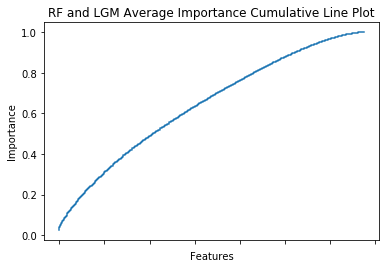

In [46]:
# Create X and y variables
X = df_customers_imputed.drop('target', axis=1)
y = df_customers_imputed['target']

# Encoding X
encoder = LabelEncoder()
X = X.apply(encoder.fit_transform)

# Train and Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True)
del X, y

# Creating Classifier Instances
reg_instances = {'RF': RandomForestClassifier(max_depth=12), 'LGBM': LGBMClassifier()}
df_importance = pd.DataFrame()
df_importance['features'] = X_train.columns

# Calculating accuracy values for each instance and feature importance
for name, instance in reg_instances.items():

    classifier = instance
    classifier.fit(X_train, y_train)

    y_pred_train = classifier.predict(X_train)
    y_pred_test = classifier.predict(X_test)

    print('{} Accuracy Train: '.format(name), accuracy_score(y_train, y_pred_train))
    print('{} Accuracy Test: '.format(name), accuracy_score(y_test, y_pred_test))
    print('\n')
    
    sorter_indices = classifier.feature_importances_.argsort()
    importance = dict(zip(X_train.columns[sorter_indices], classifier.feature_importances_[sorter_indices]/sum(classifier.feature_importances_)))
    df_importance[name] = df_importance['features'].map(importance)
    del importance, classifier

del X_train, X_test, y_train, y_test

# Creating Average Importance Values of RF and LGM Models, Sorting
df_importance['Average_Importance'] = (df_importance['RF'] + df_importance['LGBM'])/2
df_importance.set_index('features', inplace=True)
df_importance.sort_values(by='Average_Importance', ascending=False, inplace=True)

# Plotting Cumulative Importance Line Graph
df_importance['Average_Importance'].cumsum().plot(kind='line', drawstyle='steps')
plt.title('RF and LGM Average Importance Cumulative Line Plot')
plt.xlabel('Features')
plt.ylabel('Importance')

In [47]:
# Checking importance dataframe
df_importance

,RF,LGBM,Average_Importance
features,,,
D19_SOZIALES,0.032025,0.019933,0.025979
KBA13_ANZAHL_PKW,0.008561,0.017967,0.013264
D19_VERSAND_ONLINE_DATUM,0.011592,0.012500,0.012046
D19_GESAMT_ONLINE_DATUM,0.011892,0.007167,0.009529
CJT_TYP_4,0.009471,0.006700,0.008085
D19_GESAMT_ANZ_24,0.010193,0.004767,0.007480
CJT_TYP_3,0.010206,0.003200,0.006703
D19_VERSI_DATUM,0.006552,0.006733,0.006643
D19_VOLLSORTIMENT,0.004229,0.008433,0.006331


In [48]:
# Sum columns until covering 80% importance
df_importance.Average_Importance.head(220).sum()

0.80749817559408421

In [49]:
# Creating population and customers selected data with most important features.
selected_features = df_importance.index.tolist()[:220]

# Creating lists for further use.
numeric_columns = []
for column in selected_features:
    if column_types[column] in ['float64', 'int64']:
        numeric_columns.append(column)
        
categorical_columns = []
for column in selected_features:
    if column_types[column] in ['category']:
        categorical_columns.append(column)

In [50]:
numeric_columns

['KBA13_ANZAHL_PKW', 'ANZ_HAUSHALTE_AKTIV', 'ANZ_PERSONEN']

In [51]:
categorical_columns

['D19_SOZIALES',
 'D19_VERSAND_ONLINE_DATUM',
 'D19_GESAMT_ONLINE_DATUM',
 'CJT_TYP_4',
 'D19_GESAMT_ANZ_24',
 'CJT_TYP_3',
 'D19_VERSI_DATUM',
 'D19_VOLLSORTIMENT',
 'WOHNDAUER_2008',
 'CJT_KATALOGNUTZER',
 'OST_WEST_KZ',
 'KOMBIALTER',
 'ONLINE_AFFINITAET',
 'CJT_TYP_1',
 'SEMIO_KAEM',
 'SEMIO_KULT',
 'AKT_DAT_KL',
 'FINANZ_VORSORGER',
 'D19_VERSAND_DATUM',
 'VHA',
 'D19_KONSUMTYP_MAX',
 'D19_KONSUMTYP',
 'CJT_TYP_6',
 'D19_VERSAND_OFFLINE_DATUM',
 'KBA13_SITZE_4',
 'D19_TECHNIK',
 'D19_GESAMT_DATUM',
 'FINANZ_ANLEGER',
 'BALLRAUM',
 'D19_SONSTIGE',
 'W_KEIT_KIND_HH',
 'D19_DROGERIEARTIKEL',
 'KBA13_SITZE_6',
 'D19_VERSAND_ANZ_24',
 'INNENSTADT',
 'D19_BANKEN_ONLINE_DATUM',
 'SEMIO_FAM',
 'AGER_TYP',
 'RT_UEBERGROESSE',
 'D19_VERSICHERUNGEN',
 'KBA13_SITZE_5',
 'D19_BUCH_CD',
 'CJT_TYP_2',
 'KBA13_HERST_BMW_BENZ',
 'KBA13_MERCEDES',
 'GEMEINDETYP',
 'LP_FAMILIE_GROB',
 'D19_GESAMT_OFFLINE_DATUM',
 'SEMIO_VERT',
 'D19_BEKLEIDUNG_REST',
 'SEMIO_ERL',
 'RT_SCHNAEPPCHEN',
 'SEMIO_KRIT',


In [52]:
# Saving results to workspace to save time for reuse.
with open('selected_features.txt', 'wb') as output:
    pickle.dump(selected_features, output)
    
del df_importance, selected_features

**0.2.4. EDA Visualization.**

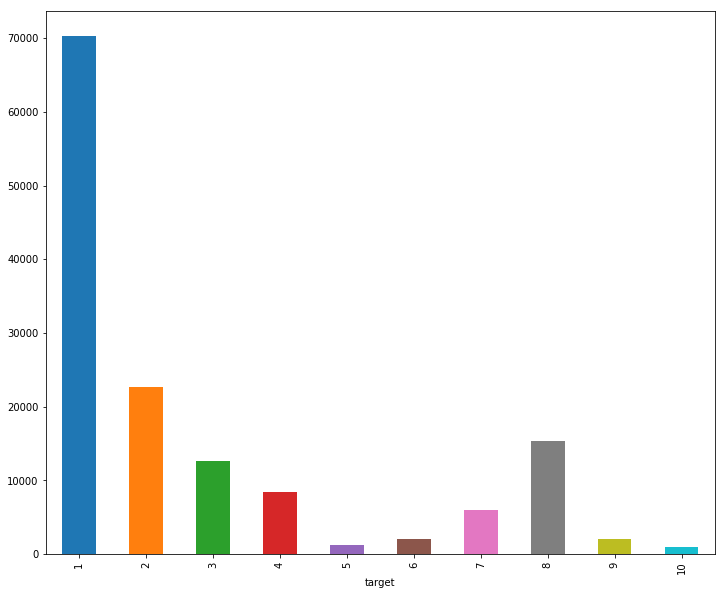

In [53]:
plt.figure(figsize=(12,10))
df_customers_imputed.groupby('target').count()['D19_SOZIALES'].plot(kind='bar')

Text(0.5,1,'Target Distribution')

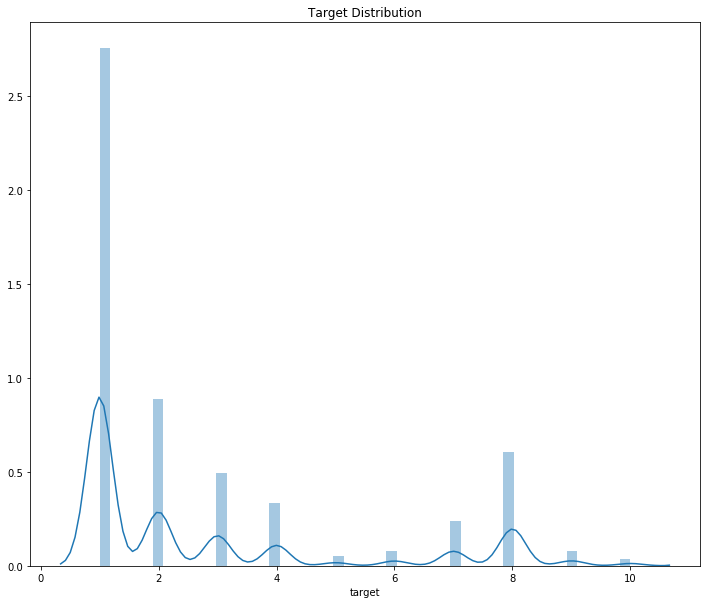

In [54]:
# Square Feet
plt.figure(figsize=(12,10))
sns.distplot(df_customers_imputed['target'])
plt.title('Target Distribution')
#plt.savefig(r'figures\\target.png')

Text(0.5,1,'Correlation Heat Map')

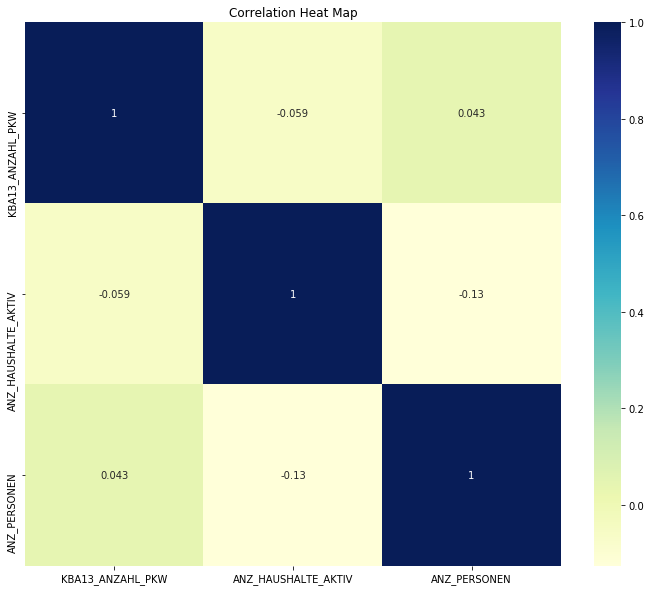

In [55]:
plt.figure(figsize=(12,10))
sns.heatmap(df_customers_imputed[numeric_columns].corr(), cmap="YlGnBu",  annot=True)
plt.title('Correlation Heat Map')

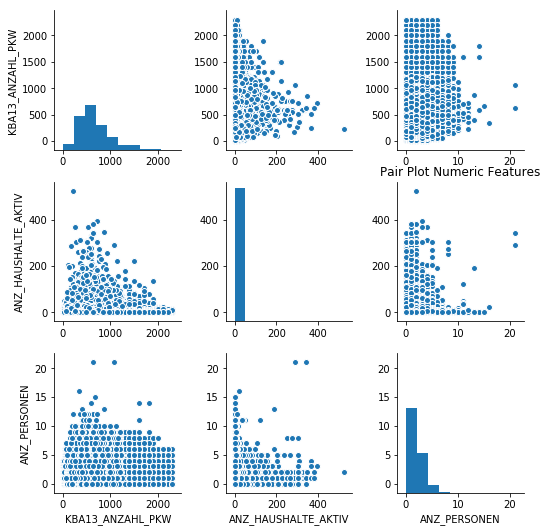

In [56]:
plt.figure(figsize=(12,10))
sns.pairplot(df_customers_imputed[numeric_columns])
plt.title('Pair Plot Numeric Features')
plt.show()

Text(0.5,1,'Number of Unique Features of Cateories')

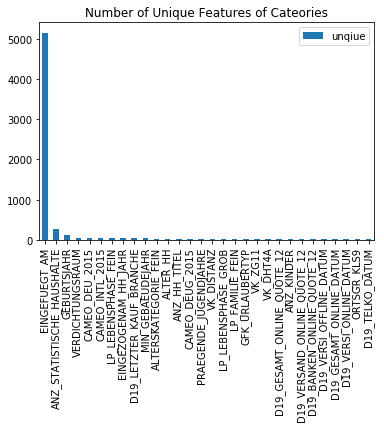

In [57]:
nunique = {}

for column in azdias.columns:
    if column not in numeric_columns:
        nunique[column] = azdias[column].nunique()

df_nunique = pd.DataFrame(list(nunique.values()), index=list(nunique.keys()), columns=['unqiue']).sort_values(by='unqiue', ascending=False).head(30)

plt.figure(figsize=(12,20))
df_nunique.plot(kind='bar')
plt.title('Number of Unique Features of Cateories')

In [58]:
df_nunique = pd.DataFrame(list(nunique.values()), index=list(nunique.keys()), columns=['unqiue']).sort_values(by='unqiue', ascending=False).head(15)

df_nunique

,unqiue
EINGEFUEGT_AM,5162
ANZ_STATISTISCHE_HAUSHALTE,268
GEBURTSJAHR,117
VERDICHTUNGSRAUM,46
CAMEO_DEU_2015,45
CAMEO_INTL_2015,43
LP_LEBENSPHASE_FEIN,41
EINGEZOGENAM_HH_JAHR,37
D19_LETZTER_KAUF_BRANCHE,35
MIN_GEBAEUDEJAHR,32


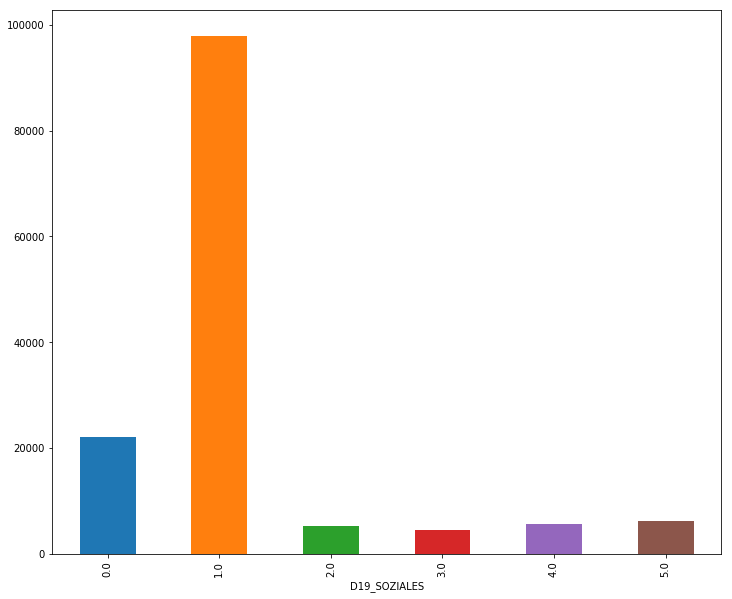

In [59]:
plt.figure(figsize=(12,10))
df_customers_imputed.groupby('D19_SOZIALES').count()['target'].plot(kind='bar')

## Part 1: Customer Segmentation Report

The main bulk of your analysis will come in this part of the project. Here, you should use unsupervised learning techniques to describe the relationship between the demographics of the company's existing customers and the general population of Germany. By the end of this part, you should be able to describe parts of the general population that are more likely to be part of the mail-order company's main customer base, and which parts of the general population are less so.

**1.1. Clustering and Visualization.**

For Clustering I've decided to use KMeans Algorithm with 10 Clusters. 10 Clusters will give us oppurtunity to  compare clusters with target variable we created.

To implement KMeans I've used only numerical columns both population and customers data since algorithm doesn't respond categorical columns.

In [61]:
# Create X variables
X = df_customers_imputed[numeric_columns]

# Encoding 
encoder = LabelEncoder()
X_encoded = X.apply(encoder.fit_transform)

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Initiate Cluster Algorithm
cluster = KMeans(n_clusters=10, max_iter=1000)

# Making predictions and saving them as cluster column
df_customers_imputed['cluster'] = cluster.fit_predict(X_scaled)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [62]:
round(df_customers_imputed.groupby('target').count()['D19_SOZIALES']/df_customers_imputed.shape[0],2).sort_values(ascending=False)

target
1     0.50
2     0.16
8     0.11
3     0.09
4     0.06
7     0.04
10    0.01
9     0.01
6     0.01
5     0.01
Name: D19_SOZIALES, dtype: float64

In [63]:
round(df_customers_imputed.groupby('cluster').count()['D19_SOZIALES']/df_customers_imputed.shape[0],2).sort_values(ascending=False)

cluster
5    0.20
9    0.17
1    0.17
0    0.16
2    0.11
4    0.09
8    0.05
6    0.04
3    0.01
7    0.00
Name: D19_SOZIALES, dtype: float64

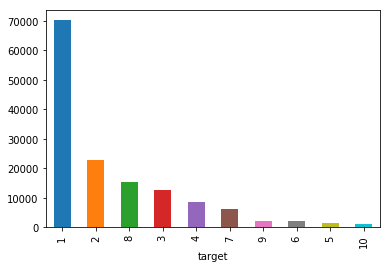

In [64]:
df_customers_imputed.groupby('target').count()['D19_SOZIALES'].sort_values(ascending=False).plot(kind='bar')

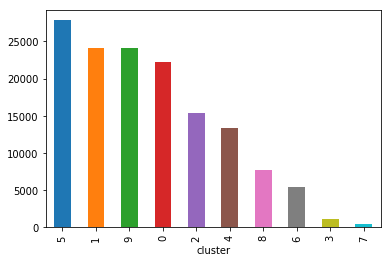

In [65]:
df_customers_imputed.groupby('cluster').count()['D19_SOZIALES'].sort_values(ascending=False).plot(kind='bar')

In [66]:
# Create X variables
X = df_azdias_imputed[numeric_columns]

# Encoding 
encoder = LabelEncoder()
X_encoded = X.apply(encoder.fit_transform)

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Making predictions and saving them as cluster column
df_azdias_imputed['cluster'] = cluster.predict(X_scaled)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


In [68]:
round(df_azdias_imputed.groupby('cluster').count()['D19_SOZIALES']/df_azdias_imputed.shape[0], 2).sort_values(ascending=False)

cluster
5    0.23
0    0.21
1    0.13
2    0.11
9    0.10
4    0.08
8    0.07
6    0.05
3    0.01
7    0.00
Name: D19_SOZIALES, dtype: float64

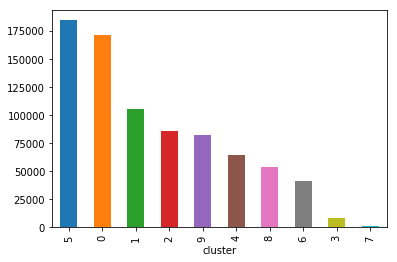

In [69]:
df_azdias_imputed.groupby('cluster').count()['D19_SOZIALES'].sort_values(ascending=False).plot(kind='bar')

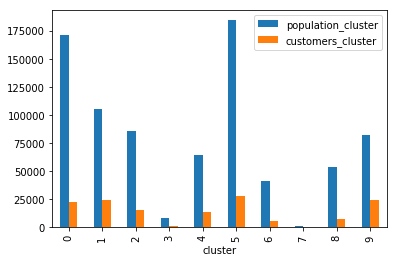

In [88]:
# Plotting Clusters for both population and customers
df_clusters = pd.DataFrame(df_azdias_imputed.groupby('cluster').count()['D19_SOZIALES'])
df_clusters['customers_cluster'] = df_customers_imputed.groupby('cluster').count()['D19_SOZIALES']

df_clusters.columns = ['population_cluster', 'customers_cluster']

plt.figure(figsize=(12,10))
df_clusters.plot(kind='bar')

## Part 2: Supervised Learning Model

Now that you've found which parts of the population are more likely to be customers of the mail-order company, it's time to build a prediction model. Each of the rows in the "MAILOUT" data files represents an individual that was targeted for a mailout campaign. Ideally, we should be able to use the demographic information from each individual to decide whether or not it will be worth it to include that person in the campaign.

The "MAILOUT" data has been split into two approximately equal parts, each with almost 43 000 data rows. In this part, you can verify your model with the "TRAIN" partition, which includes a column, "RESPONSE", that states whether or not a person became a customer of the company following the campaign. In the next part, you'll need to create predictions on the "TEST" partition, where the "RESPONSE" column has been withheld.

In [89]:
mailout_train = pd.read_csv('../../data/Term2/capstone/arvato_data/Udacity_MAILOUT_052018_TRAIN.csv', sep=';', index_col='LNR')

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [90]:
mailout_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42962 entries, 1763 to 69224
Columns: 366 entries, AGER_TYP to ALTERSKATEGORIE_GROB
dtypes: float64(267), int64(93), object(6)
memory usage: 120.3+ MB


**2.1 Preprocessing**

In [91]:
# Reading selected features and creating a new df with selected features and imputation
with open('selected_features.txt', 'rb') as file:
    selected_features_train = pickle.load(file)

selected_features_train.append('RESPONSE')
df_mailout_train_imputed = f_cleaner(mailout_train)[selected_features_train]

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.6/site-p

In [92]:
df_mailout_train_imputed.head()

,D19_SOZIALES,KBA13_ANZAHL_PKW,D19_VERSAND_ONLINE_DATUM,D19_GESAMT_ONLINE_DATUM,CJT_TYP_4,D19_GESAMT_ANZ_24,CJT_TYP_3,D19_VERSI_DATUM,D19_VOLLSORTIMENT,WOHNDAUER_2008,...,KBA13_CCM_1401_2500,KBA05_ZUL2,KBA13_KMH_0_140,KBA05_MOD1,FINANZ_MINIMALIST,KBA05_KRSHERST1,KBA05_SEG1,KBA13_BJ_2006,KBA13_KMH_140,RESPONSE
LNR,,,,,,,,,,,,,,,,,,,,,
1763,1.0,390.0,9,9,5.0,0,5.0,9,6,9.0,...,3.0,4.0,3.0,3.0,3,4.0,0.0,3.0,4.0,0
1771,5.0,586.0,8,8,3.0,2,4.0,10,6,9.0,...,4.0,3.0,4.0,0.0,5,2.0,2.0,3.0,4.0,0
1776,2.0,297.0,10,7,5.0,2,5.0,10,6,9.0,...,4.0,2.0,1.0,1.0,5,4.0,1.0,3.0,1.0,0
1460,1.0,373.0,10,10,5.0,0,5.0,10,6,9.0,...,1.0,1.0,5.0,3.0,4,5.0,0.0,4.0,5.0,0
1783,1.0,285.0,10,10,5.0,1,5.0,10,7,9.0,...,4.0,2.0,1.0,2.0,3,3.0,0.0,4.0,1.0,0


In [93]:
df_mailout_train_imputed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35185 entries, 1763 to 69224
Columns: 221 entries, D19_SOZIALES to RESPONSE
dtypes: category(218), float64(3)
memory usage: 8.4 MB


In [94]:
df_mailout_train_imputed.groupby('RESPONSE').count()['D19_SOZIALES']

RESPONSE
0    34746
1      439
Name: D19_SOZIALES, dtype: int64

Text(0.5,1,'Imbalance of Categories')

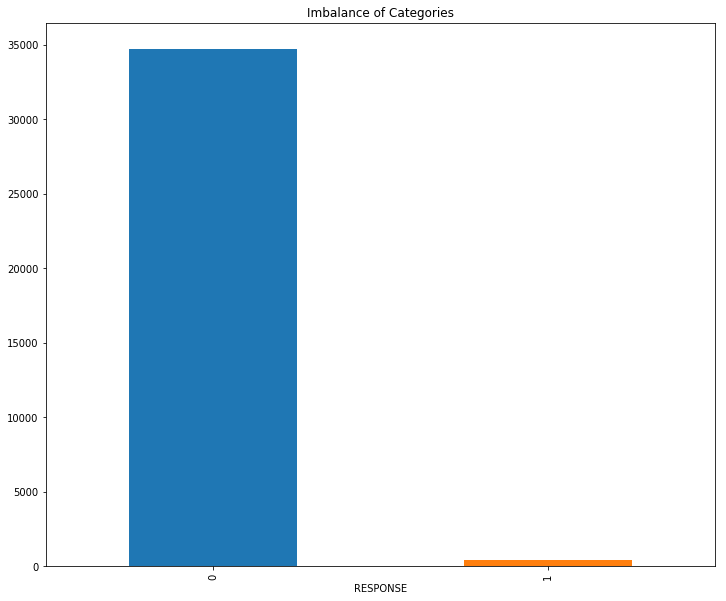

In [95]:
plt.figure(figsize=(12,10))
df_mailout_train_imputed.groupby('RESPONSE').count()['D19_SOZIALES'].plot(kind='bar')
plt.title('Imbalance of Categories')

**2.2. Model Selection**

For the model selection part, I’ve decided to use 7 classification algorithms and 2 sampling technique.
Since our training set were highly imbalanced sampling was necessary for coming up a respectable solution. First I’ve used classifiers class_weight='balanced' parameter, secondly I’ve used SMOTE - Synthetic Minority Over Technique to oversample training data set. 
 
Following articles and posts helped me to code:

https://towardsdatascience.com/methods-for-dealing-with-imbalanced-data-5b761be45a18

https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.SMOTE.html

https://www.kaggle.com/c/talkingdata-adtracking-fraud-detection/discussion/51544

https://towardsdatascience.com/practical-tips-for-class-imbalance-in-binary-classification-6ee29bcdb8a7

In [96]:
# Create X and y variables
X = df_mailout_train_imputed.drop('RESPONSE', axis=1)
y = df_mailout_train_imputed['RESPONSE']

# Encoding 
encoder = LabelEncoder()
X = X.apply(encoder.fit_transform)

# pd.get_dummies.
X_encoded = pd.get_dummies(X, drop_first=True)

# Scaling with Standard Scalar
scaler = StandardScaler()
X_scaled = X_encoded
for column in X_scaled:
    if X_scaled[column].dtype in ['float64', 'int64']:
        X_scaled[column] = scaler.fit_transform(X_scaled[column].values.reshape(-1, 1))

# Train and Test Split and SMOTE OverSampling
# LightGBM, RF and GB Classifiers uses categorical-unencoded and unscaled data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True)
  
# XGBoost Classifier uses encoded but unscaled data.
X_train_encoded, X_test_encoded, y_train_encoded, y_test_encoded = train_test_split(X_encoded.values, y,
                                                                                    test_size=0.25, shuffle=True)
  
# Logistic Recression and MLP and SVM Classifiers use encoded and scaled data.
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y, test_size=0.25,
                                                                                shuffle=True)

del X, y, X_encoded, X_scaled

# Defining Regressor Instances
classifier_instances = {'Logistic Regression': LogisticRegression(class_weight='balanced'),
                        'Linear SVC': LinearSVC(class_weight='balanced'),
                        'LightGBM Classifier': LGBMClassifier(is_unbalanced = True),
                        'XGBoost Classifier': XGBClassifier(is_unbalanced = True),
                        'RandomForest Classifier': RandomForestClassifier(n_estimators=100, class_weight='balanced'),
                        'GradientBoosting Classifier': GradientBoostingClassifier(),
                        'MLP Classifier': MLPClassifier(hidden_layer_sizes=(512, 256, 128, 64, 32))}

# Defining a dict to store results
model_results = {}

# Creating Instances and Making Predictions
for name, classifier in classifier_instances.items():
    if name in ['LightGBM Classifier', 'RandomForest Classifier', 'GradientBoosting Classifier']:
        classifier.fit(X_train, y_train)
    elif name == 'XGBoost Classifier':
        classifier.fit(X_train_encoded, y_train_encoded)
    else:
        classifier.fit(X_train_scaled, y_train_scaled)

    # Predictions and Metrics
    if name in ['LightGBM Classifier', 'RandomForest Classifier', 'GradientBoosting Classifier']:
        y_pred_test = classifier.predict(X_test)
    elif name == 'XGBoost Classifier':
        y_pred_test = classifier.predict(X_test_encoded)
    else:
        y_pred_test = classifier.predict(X_test_scaled)

    model_results[name] = roc_auc_score(y_test, y_pred_test)
    print('{} Confusion Matrix:\n'.format(name), confusion_matrix(y_test, y_pred_test), '\n')
    print('{} Classification Report:\n'.format(name), classification_report(y_test, y_pred_test), '\n')
    del classifier, y_pred_test

del X_train, X_test, y_train, y_test 
del X_train_encoded, X_test_encoded, y_train_encoded, y_test_encoded
del X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled

# Creating a Result DF and Saving it to a CSV
df_model_results = pd.DataFrame(model_results, index=['ROC_AUC_Score'])

df_model_results

Logistic Regression Confusion Matrix:
 [[6201 2476]
 [  90   30]] 

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.71      0.83      8677
           1       0.01      0.25      0.02       120

    accuracy                           0.71      8797
   macro avg       0.50      0.48      0.43      8797
weighted avg       0.97      0.71      0.82      8797
 



/opt/conda/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Linear SVC Confusion Matrix:
 [[8672    5]
 [ 119    1]] 

Linear SVC Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      8677
           1       0.17      0.01      0.02       120

    accuracy                           0.99      8797
   macro avg       0.58      0.50      0.50      8797
weighted avg       0.98      0.99      0.98      8797
 

LightGBM Classifier Confusion Matrix:
 [[8677    0]
 [ 120    0]] 

LightGBM Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      8677
           1       0.00      0.00      0.00       120

    accuracy                           0.99      8797
   macro avg       0.49      0.50      0.50      8797
weighted avg       0.97      0.99      0.98      8797
 



/opt/conda/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


XGBoost Classifier Confusion Matrix:
 [[8677    0]
 [ 120    0]] 

XGBoost Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      8677
           1       0.00      0.00      0.00       120

    accuracy                           0.99      8797
   macro avg       0.49      0.50      0.50      8797
weighted avg       0.97      0.99      0.98      8797
 



/opt/conda/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


RandomForest Classifier Confusion Matrix:
 [[8677    0]
 [ 120    0]] 

RandomForest Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      8677
           1       0.00      0.00      0.00       120

    accuracy                           0.99      8797
   macro avg       0.49      0.50      0.50      8797
weighted avg       0.97      0.99      0.98      8797
 



/opt/conda/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


GradientBoosting Classifier Confusion Matrix:
 [[8672    5]
 [ 120    0]] 

GradientBoosting Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      8677
           1       0.00      0.00      0.00       120

    accuracy                           0.99      8797
   macro avg       0.49      0.50      0.50      8797
weighted avg       0.97      0.99      0.98      8797
 

MLP Classifier Confusion Matrix:
 [[8663   14]
 [ 120    0]] 

MLP Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      8677
           1       0.00      0.00      0.00       120

    accuracy                           0.98      8797
   macro avg       0.49      0.50      0.50      8797
weighted avg       0.97      0.98      0.98      8797
 



,Logistic Regression,Linear SVC,LightGBM Classifier,XGBoost Classifier,RandomForest Classifier,GradientBoosting Classifier,MLP Classifier
ROC_AUC_Score,0.482324,0.503879,0.5,0.5,0.5,0.499712,0.499193


In [98]:
# Create X and y variables
X = df_mailout_train_imputed.drop('RESPONSE', axis=1)
y = df_mailout_train_imputed['RESPONSE']

# Encoding 
encoder = LabelEncoder()
X = X.apply(encoder.fit_transform)

# pd.get_dummies.
X_encoded = pd.get_dummies(X, drop_first=True)

# Scaling with Standard Scalar
scaler = StandardScaler()
X_scaled = X_encoded
for column in X_scaled:
    if X_scaled[column].dtype in ['float64', 'int64']:
        X_scaled[column] = scaler.fit_transform(X_scaled[column].values.reshape(-1, 1))

# Resampling - Smote
smote = SMOTE()
             
# Train and Test Split and SMOTE OverSampling
# LightGBM, RF and GB Classifiers uses categorical-unencoded and unscaled data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True)
X_train, y_train = smote.fit_sample(X_train, y_train)   

# XGBoost Classifier uses encoded but unscaled data.
X_train_encoded, X_test_encoded, y_train_encoded, y_test_encoded = train_test_split(X_encoded.values, y,
                                                                                    test_size=0.25, shuffle=True)
X_train_encoded, y_train_encoded = smote.fit_sample(X_train_encoded, y_train_encoded)   

# Logistic Recression and MLP and SVM Classifiers use encoded and scaled data.
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y, test_size=0.25,
                                                                                shuffle=True)
X_train_scaled, y_train_scaled = smote.fit_sample(X_train_scaled, y_train_scaled)

del X, y, X_encoded, X_scaled

# Defining Regressor Instances
classifier_instances = {'Logistic Regression': LogisticRegression(),
                        'Linear SVC': LinearSVC(),
                        'LightGBM Classifier': LGBMClassifier(),
                        'XGBoost Classifier': XGBClassifier(),
                        'RandomForest Classifier': RandomForestClassifier(n_estimators=100),
                        'GradientBoosting Classifier': GradientBoostingClassifier(),
                        'MLP Classifier': MLPClassifier(hidden_layer_sizes=(512, 256, 128, 64, 32))}

# Defining a dict to store results
model_results = {}

# Creating Instances and Making Predictions
for name, classifier in classifier_instances.items():
    if name in ['LightGBM Classifier', 'RandomForest Classifier', 'GradientBoosting Classifier']:
        classifier.fit(X_train, y_train)
    elif name == 'XGBoost Classifier':
        classifier.fit(X_train_encoded, y_train_encoded)
    else:
        classifier.fit(X_train_scaled, y_train_scaled)

    # Predictions and Metrics
    if name in ['LightGBM Classifier', 'RandomForest Classifier', 'GradientBoosting Classifier']:
        y_pred_test = classifier.predict(X_test)
    elif name == 'XGBoost Classifier':
        y_pred_test = classifier.predict(X_test_encoded)
    else:
        y_pred_test = classifier.predict(X_test_scaled)

    model_results[name] = roc_auc_score(y_test, y_pred_test)
    print('{} Confusion Matrix:\n'.format(name), confusion_matrix(y_test, y_pred_test), '\n')
    print('{} Classification Report:\n'.format(name), classification_report(y_test, y_pred_test), '\n')
    del classifier, y_pred_test

del X_train, X_test, y_train, y_test 
del X_train_encoded, X_test_encoded, y_train_encoded, y_test_encoded
del X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled


# Creating a Result DF and Saving it to a CSV
df_model_results = pd.DataFrame(model_results, index=['ROC_AUC_Score'])

df_model_results

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Logistic Regression Confusion Matrix:
 [[6557 2133]
 [  69   38]] 

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.75      0.86      8690
           1       0.02      0.36      0.03       107

    accuracy                           0.75      8797
   macro avg       0.50      0.55      0.44      8797
weighted avg       0.98      0.75      0.85      8797
 



/opt/conda/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Linear SVC Confusion Matrix:
 [[6461 2229]
 [  70   37]] 

Linear SVC Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.74      0.85      8690
           1       0.02      0.35      0.03       107

    accuracy                           0.74      8797
   macro avg       0.50      0.54      0.44      8797
weighted avg       0.98      0.74      0.84      8797
 

LightGBM Classifier Confusion Matrix:
 [[8687    3]
 [ 106    1]] 

LightGBM Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      8690
           1       0.25      0.01      0.02       107

    accuracy                           0.99      8797
   macro avg       0.62      0.50      0.51      8797
weighted avg       0.98      0.99      0.98      8797
 

XGBoost Classifier Confusion Matrix:
 [[8689    1]
 [ 107    0]] 

XGBoost Classifier Classification Report:
               precision   

/opt/conda/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


GradientBoosting Classifier Confusion Matrix:
 [[8658   32]
 [ 105    2]] 

GradientBoosting Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      8690
           1       0.06      0.02      0.03       107

    accuracy                           0.98      8797
   macro avg       0.52      0.51      0.51      8797
weighted avg       0.98      0.98      0.98      8797
 

MLP Classifier Confusion Matrix:
 [[8676   14]
 [ 106    1]] 

MLP Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      8690
           1       0.07      0.01      0.02       107

    accuracy                           0.99      8797
   macro avg       0.53      0.50      0.50      8797
weighted avg       0.98      0.99      0.98      8797
 



,Logistic Regression,Linear SVC,LightGBM Classifier,XGBoost Classifier,RandomForest Classifier,GradientBoosting Classifier,MLP Classifier
ROC_AUC_Score,0.554843,0.544646,0.5045,0.499942,0.5,0.507505,0.503867


Although Linear SVC is the most promissing, it is a computationaly expensice algorithm. Therefore i've chosen second best algorithm Logistic Regression for tuning. 

For tuning i've applied sklerns GridSearchCV algorithim for 2 parameters below:

In [104]:
# Create X and y variables
X = df_mailout_train_imputed.drop('RESPONSE', axis=1)
y = df_mailout_train_imputed['RESPONSE']

# Encoding 
encoder = LabelEncoder()
X = X.apply(encoder.fit_transform)

# pd.get_dummies.
X_encoded = pd.get_dummies(X, drop_first=True)

# Scaling with Standard Scalar
scaler = StandardScaler()
X_scaled = X_encoded
for column in X_scaled:
    if X_scaled[column].dtype in ['float64', 'int64']:
        X_scaled[column] = scaler.fit_transform(X_scaled[column].values.reshape(-1, 1))


# # Logistic Recression use encoded and scaled data.
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, shuffle=True)

del X, y, X_encoded, X_scaled

# Resampling - Smote OverSampling
smote = SMOTE()
X_train, y_train = smote.fit_sample(X_train, y_train)

final_classifer = GridSearchCV(estimator=LogisticRegression(),
                               param_grid={'max_iter':[1000, 5000], 'warm_start':[True, False]},
                               scoring='roc_auc',
                               cv=10)


final_classifer.fit(X_train, y_train)

y_pred_test_p = final_classifer.predict_proba(X_test)[:,1]
y_pred_test_b = final_classifer.predict(X_test)

print('Test Roc_Auc_Score: ', roc_auc_score(y_test, y_pred_test_p))

print('{} Classification Report:\n'.format(final_classifer), confusion_matrix(y_test, y_pred_test_b), '\n')
print('{} Classification Report:\n'.format(final_classifer), classification_report(y_test, y_pred_test_b), '\n')

Test Roc_Auc_Score:  0.694998654519
GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'max_iter': [1000, 5000], 'warm_start': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0) Classification Report:
 [[6638 2033]
 [  65   61]] 

GridSearchCV(cv=10, error_score=nan,
             estimator=Lo

In [105]:
# Let's check our final estimator.
final_classifer.best_estimator_

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=True)

## Part 3: Kaggle Competition

Now that you've created a model to predict which individuals are most likely to respond to a mailout campaign, it's time to test that model in competition through Kaggle. If you click on the link [here](http://www.kaggle.com/t/21e6d45d4c574c7fa2d868f0e8c83140), you'll be taken to the competition page where, if you have a Kaggle account, you can enter. If you're one of the top performers, you may have the chance to be contacted by a hiring manager from Arvato or Bertelsmann for an interview!

Your entry to the competition should be a CSV file with two columns. The first column should be a copy of "LNR", which acts as an ID number for each individual in the "TEST" partition. The second column, "RESPONSE", should be some measure of how likely each individual became a customer – this might not be a straightforward probability. As you should have found in Part 2, there is a large output class imbalance, where most individuals did not respond to the mailout. Thus, predicting individual classes and using accuracy does not seem to be an appropriate performance evaluation method. Instead, the competition will be using AUC to evaluate performance. The exact values of the "RESPONSE" column do not matter as much: only that the higher values try to capture as many of the actual customers as possible, early in the ROC curve sweep.

In [106]:
mailout_test = pd.read_csv('../../data/Term2/capstone/arvato_data/Udacity_MAILOUT_052018_TEST.csv', sep=';', index_col='LNR')

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [107]:
mailout_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42833 entries, 1754 to 68898
Columns: 365 entries, AGER_TYP to ALTERSKATEGORIE_GROB
dtypes: float64(267), int64(92), object(6)
memory usage: 119.6+ MB


In [108]:
# Reading selected features and creating a new df with selected features and imputation
with open('selected_features.txt', 'rb') as file:
    selected_features_test = pickle.load(file)

df_mailout_test_imputed = f_cleaner_for_test(mailout_test)[selected_features_test]

In [109]:
# Create X variables
X = df_mailout_test_imputed

# Encoding 
encoder = LabelEncoder()
X = X.apply(encoder.fit_transform)

# pd.get_dummies.
X_encoded = pd.get_dummies(X, drop_first=True)

# Scaling with Standard Scalar
scaler = StandardScaler()
X_scaled = X_encoded
for column in X_scaled:
    if X_scaled[column].dtype in ['float64', 'int64']:
        X_scaled[column] = scaler.fit_transform(X_scaled[column].values.reshape(-1, 1))

df_submission = pd.DataFrame(final_classifer.predict_proba(X_scaled)[:,1] ,index=X_scaled.index, columns=['RESPONSE'])

df_submission.head()

,RESPONSE
LNR,
1754,0.799403
1770,0.649748
1465,0.071053
1470,0.058122
1478,0.615505


In [110]:
df_submission.to_csv('submission.csv')

Submission this result on competition was scored as 0.63208 and my ranking was 85 by the time, I was writing. 
This was not great but a respectful first results. It showed me, I was on the right path and had room for improvement. 